<a href="https://colab.research.google.com/github/plaban1981/Handle-Imbalanced-Datasets-Techniques/blob/master/Predict_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Heart Disease Prediction


In this machine learning project, we have collected the dataset from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci) and we will be using Machine Learning to predict whether any person is suffering from heart disease

In [1]:
from google.colab import files
files.upload()

Saving dataset.csv to dataset.csv


{'dataset.csv': b'\xef\xbb\xbfage,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target\n63,1,3,145,233,1,0,150,0,2.3,0,0,1,1\n37,1,2,130,250,0,1,187,0,3.5,0,0,2,1\n41,0,1,130,204,0,0,172,0,1.4,2,0,2,1\n56,1,1,120,236,0,1,178,0,0.8,2,0,2,1\n57,0,0,120,354,0,1,163,1,0.6,2,0,2,1\n57,1,0,140,192,0,1,148,0,0.4,1,0,1,1\n56,0,1,140,294,0,0,153,0,1.3,1,0,2,1\n44,1,1,120,263,0,1,173,0,0,2,0,3,1\n52,1,2,172,199,1,1,162,0,0.5,2,0,3,1\n57,1,2,150,168,0,1,174,0,1.6,2,0,2,1\n54,1,0,140,239,0,1,160,0,1.2,2,0,2,1\n48,0,2,130,275,0,1,139,0,0.2,2,0,2,1\n49,1,1,130,266,0,1,171,0,0.6,2,0,2,1\n64,1,3,110,211,0,0,144,1,1.8,1,0,2,1\n58,0,3,150,283,1,0,162,0,1,2,0,2,1\n50,0,2,120,219,0,1,158,0,1.6,1,0,2,1\n58,0,2,120,340,0,1,172,0,0,2,0,2,1\n66,0,3,150,226,0,1,114,0,2.6,0,0,2,1\n43,1,0,150,247,0,1,171,0,1.5,2,0,2,1\n69,0,3,140,239,0,1,151,0,1.8,2,2,2,1\n59,1,0,135,234,0,1,161,0,0.5,1,0,3,1\n44,1,2,130,233,0,1,179,1,0.4,2,0,2,1\n42,1,0,140,226,0,1,178,0,0,2,0,2,1\n61,1,2,150,243,1,1,137,

## Import Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Here we will be experimenting with 4 algorithms

* KNeighborsClassifier

* DecisionTreeClassifier

* RandomForestClassifier

* VotingClassifier to compute accuracy score via majority voting principle


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

## import Dataset

In [5]:
df = pd.read_csv('dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Schema 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


## Data Statistics

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Feature Selection

## Technique 1 - Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

In [0]:
X = df.drop('target',axis=1)
Y = df['target']
x = X.values
y = Y.values.reshape(-1,1)

## Apply SelectKBest class to extract top 10 best feature

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [14]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [24]:
x.shape,y.shape

((303, 13), (303, 1))

In [0]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)


In [29]:
fit.scores_

array([ 23.28662399,   7.57683451,  62.59809791,  14.8239245 ,
        23.93639448,   0.20293368,   2.97827075, 188.32047169,
        38.91437697,  72.64425301,   9.8040952 ,  66.44076512,
         5.79185297])

In [33]:
X.columns.tolist()

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [0]:
dfscores = pd.DataFrame({'Features' :X.columns,'Score':fit.scores_})

In [39]:
print(dfscores.nlargest(10,'Score'))  #print 10 best features

    Features       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835


## Correlation Matrix with Heatmap

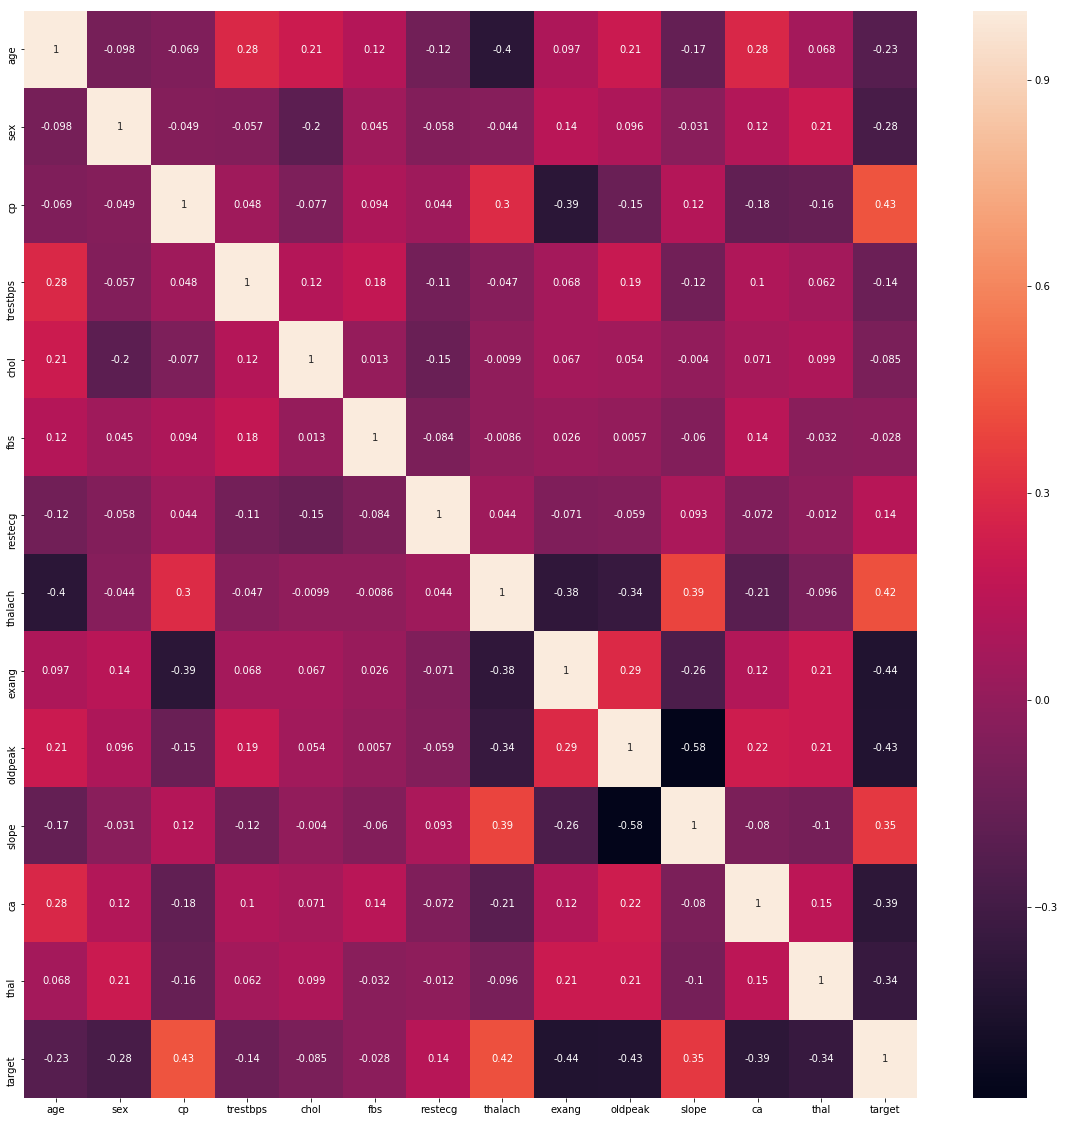

In [40]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True)

## Note from the heat map it is evident that the feature exang  is the most correlated with target while the feature  fbs is the least  corelated

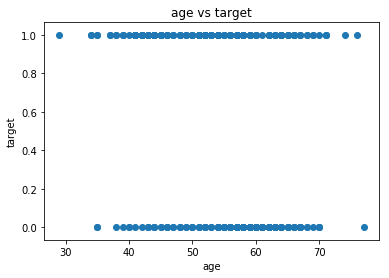

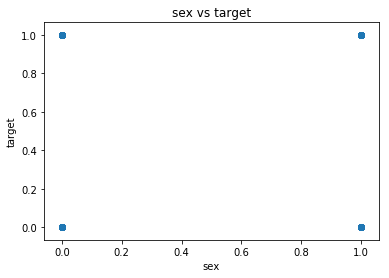

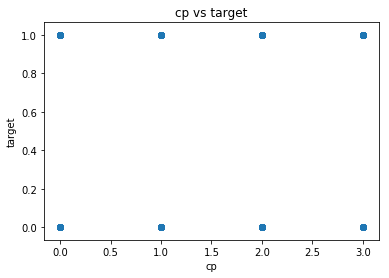

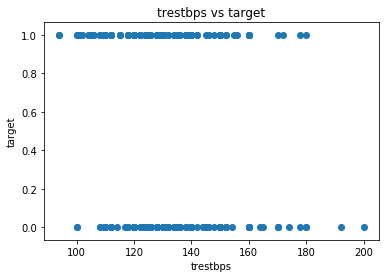

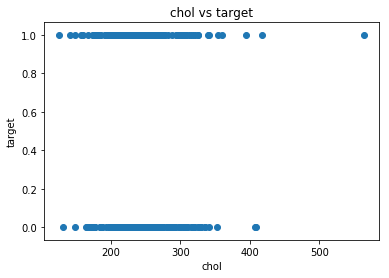

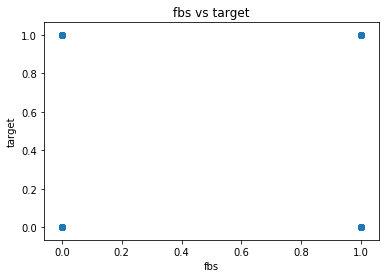

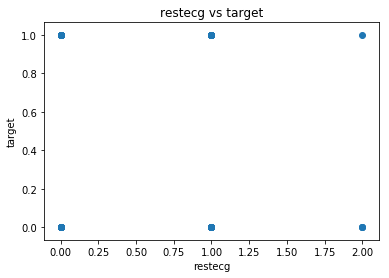

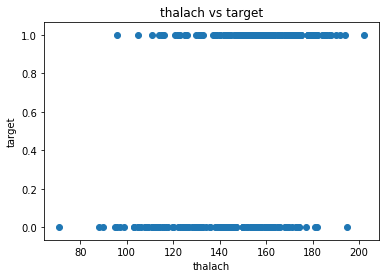

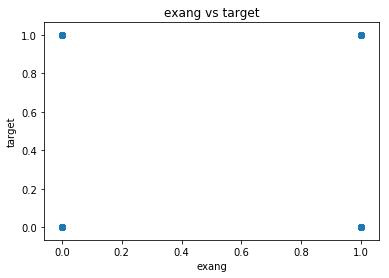

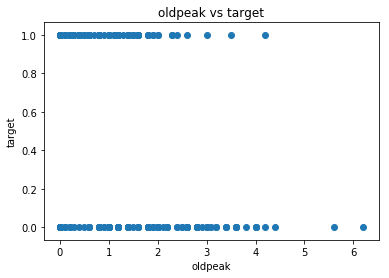

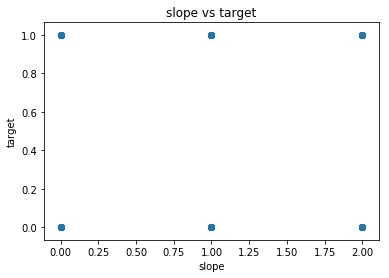

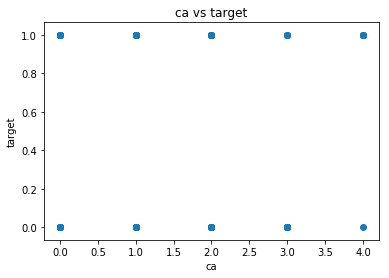

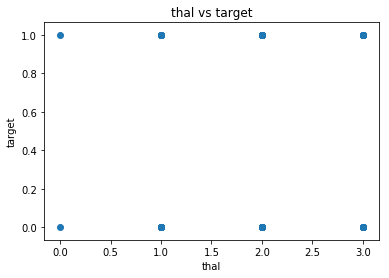

In [43]:
for features in dfscores['Features'].values:
  plt.scatter(df[features].values,df['target'].values)
  plt.title(features+' vs target')
  plt.xlabel(features)
  plt.ylabel('target')
  plt.show()

## Check if the dataset is balanced

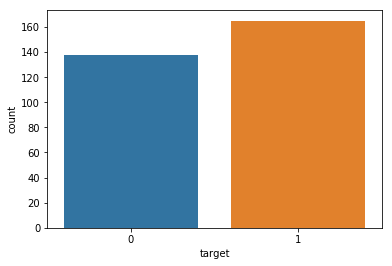

In [44]:
sns.countplot(x='target',data=df)

## The dataset seems to be balanced as evident from the count plot

## Data Preprocessing - LabelEncoding Categorical Values

use the get_dummies method to create dummy columns for categorical variables.

In [0]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [47]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


## Data Normalization

In [0]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [49]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


## Train Test Split the Data Sample

In [0]:
from sklearn.model_selection import train_test_split
X = dataset.drop('target',axis=1)
y = dataset['target']


## Applying various Classifiers to check the accuracy scores

In [0]:
knn = KNeighborsClassifier(n_neighbors = 12)
knn_score = []
rf = RandomForestClassifier(n_estimators=10)
rf_score = []
dt = DecisionTreeClassifier(max_depth=10,criterion='entropy')
dt_score = []
vt = VotingClassifier(estimators=[('KNN',knn),('RF',rf),('DT',dt)],voting='hard')
vt_score = []


In [65]:
model_list = ['KNNClassifier','RandomForestClassifier','DecisionTreeClassifier','VotingClassifier']
i = 0
for model in [knn,rf,dt,vt] :
  scores = cross_val_score(model,X,y,cv=10,scoring='accuracy')
  print('Model : ',model_list[i],': ',scores.mean())
  i+=1


Model :  KNNClassifier :  0.8506637004078605
Model :  RandomForestClassifier :  0.80431219873934
Model :  DecisionTreeClassifier :  0.7546051167964405
Model :  VotingClassifier :  0.830993696700037


##  VotingClassifier works well when we have a number of equally well performing models as it can balance their individual weakness.

In [0]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

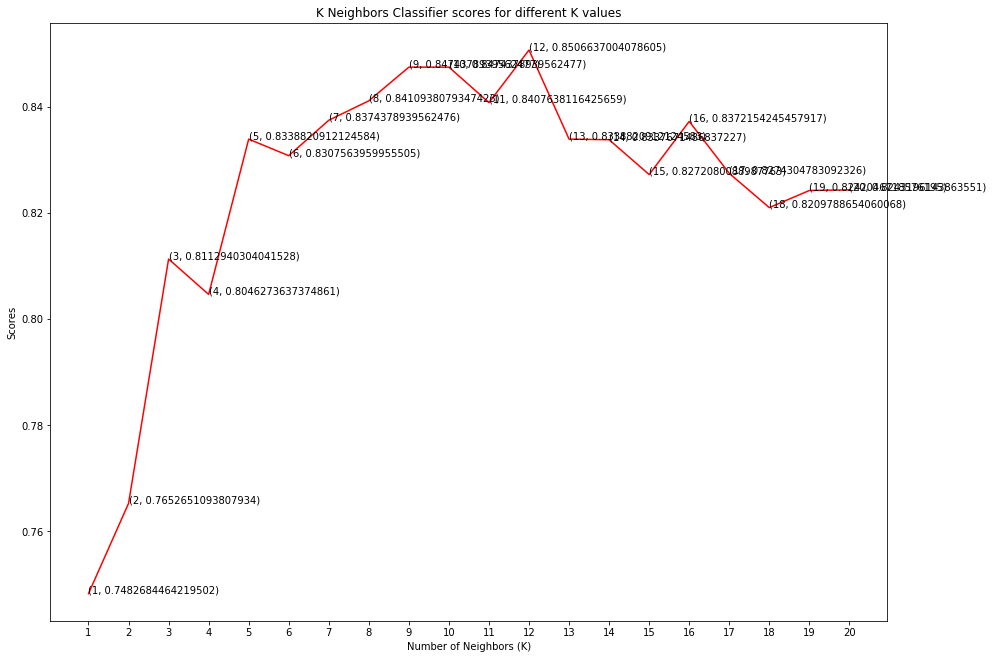

In [73]:
plt.figure(figsize=(15,11))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [0]:
rf_scores = []
for k in range(1,25):
    rf_classifier = RandomForestClassifier(n_estimators=k)
    score=cross_val_score(rf_classifier,X,y,cv=10)
    rf_scores.append(score.mean())

Text(0.5, 1.0, 'Random Forest Classifier scores for different estimator values')

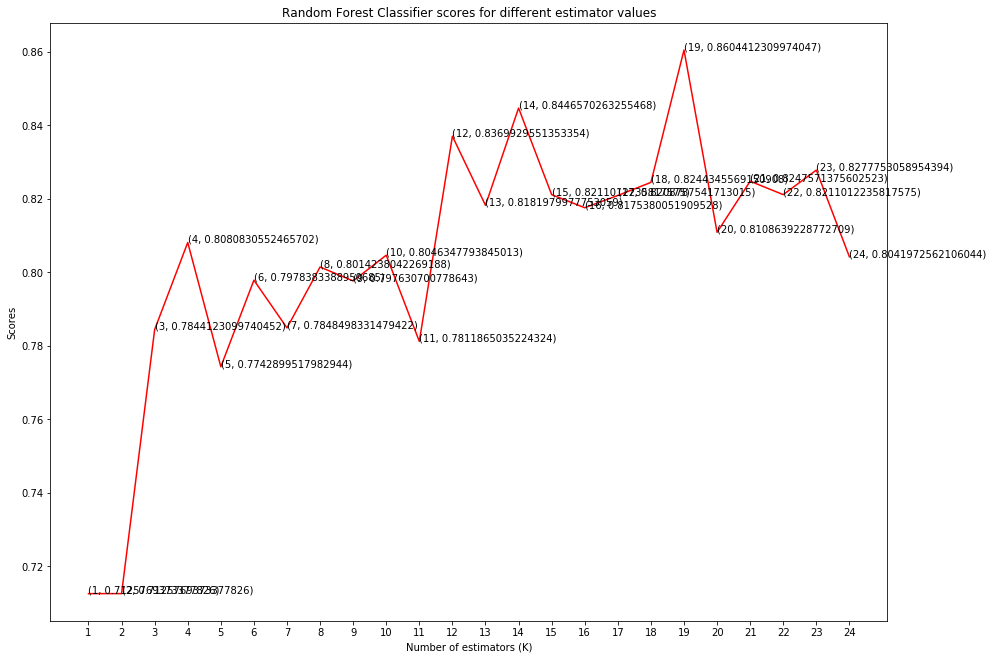

In [75]:
plt.figure(figsize=(15,11))
plt.plot([k for k in range(1, 25)], rf_scores, color = 'red')
for i in range(1,25):
    plt.text(i, rf_scores[i-1], (i, rf_scores[i-1]))
plt.xticks([i for i in range(1, 25)])
plt.xlabel('Number of estimators (K)')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different estimator values')

In [0]:
dt_scores = []
for k in range(1,25):
    dt_classifier = DecisionTreeClassifier(max_depth=k)
    score=cross_val_score(dt_classifier,X,y,cv=10)
    dt_scores.append(score.mean())

Text(0.5, 1.0, 'Decision Tree Classifier scores for different K values')

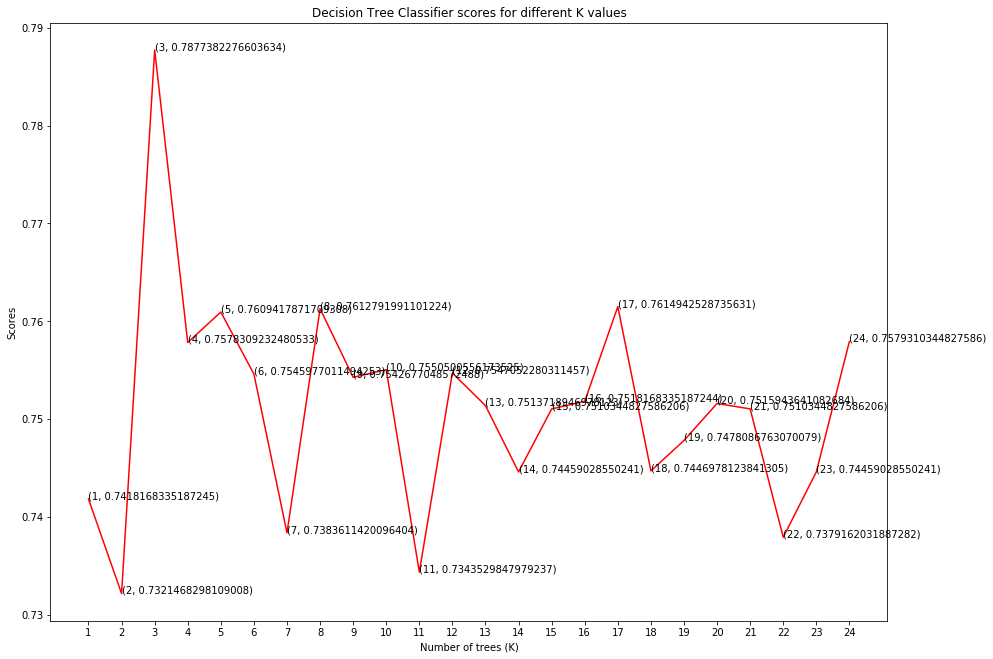

In [76]:
plt.figure(figsize=(15,11))
plt.plot([k for k in range(1, 25)], dt_scores, color = 'red')
for i in range(1,25):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, 25)])
plt.xlabel('Number of trees (K)')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different K values')

## retrianing the models with optimum parameters as depicted in the visualizations above

In [0]:
knn = KNeighborsClassifier(n_neighbors = 12)
rf = RandomForestClassifier(n_estimators=19)
dt = DecisionTreeClassifier(max_depth=3,criterion='entropy')
vt = VotingClassifier(estimators=[('KNN',knn),('RF',rf),('DT',dt)],voting='hard')

In [78]:
model_list = ['KNNClassifier','RandomForestClassifier','DecisionTreeClassifier','VotingClassifier']
i = 0
for model in [knn,rf,dt,vt] :
  scores = cross_val_score(model,X,y,cv=10,scoring='accuracy')
  print('Model : ',model_list[i],': ',scores.mean())
  i+=1

Model :  KNNClassifier :  0.8506637004078605
Model :  RandomForestClassifier :  0.820641453466815
Model :  DecisionTreeClassifier :  0.7712866147571374
Model :  VotingClassifier :  0.8305413422321097
